In [97]:
import pandas as pd
from scipy.spatial import distance

#https://www.google.com/covid19/mobility/
url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df20 = pd.read_csv(url2020)
df20.info()

df21 = pd.read_csv(url2021)
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

# 1. Soru

In [110]:
df20=df20.dropna(axis=1,how='all')
df20.info()

df21=df21.dropna(axis=1,how='all')
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 167657 non-null  object        
 1   country_region                                      167657 non-null  object        
 2   sub_region_1                                        167336 non-null  object        
 3   sub_region_2                                        141692 non-null  object        
 4   iso_3166_2_code                                     25644 non-null   object        
 5   place_id                                            167657 non-null  object        
 6   date                                                167657 non-null  datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  101865 non-null  float64       

# 2. Soru

Kullandığım kaynaklar

https://www.statology.org/mahalanobis-distance-python/

https://www.machinelearningplus.com/statistics/mahalanobis-distance/

In [111]:
#Distance ölçümü için 
#covariance matrisini numpy.cov() fonksiyonu, 
#inverse (tersini) numpy.linalg.inv() fonksiyonu 
#ve aşağıdaki scipy fonksiyonunu kullanabilirsiniz: 
#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html 
import numpy as np #np.cov(), np.linalg.inv()
import matplotlib.pyplot as plt
#from scipy.spatial import distance

In [112]:
df20["date"] = pd.to_datetime(df20["date"])
df20x = df20.groupby(pd.Grouper(key='date', freq='1M')).mean()

df21["date"] = pd.to_datetime(df21["date"])
df21x = df21.groupby(pd.Grouper(key='date', freq='1M')).mean()

In [113]:
df20x

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,
2020-02-29,2.028130,3.238759,4.509374,-6.643751,9.353484,-0.698443
2020-03-31,-21.700010,-4.395083,-6.153226,-22.896115,-12.652553,6.332819
2020-04-30,-63.148836,-26.497847,-42.117354,-64.418867,-47.539997,20.742720
2020-05-31,-55.673896,-15.239506,-28.837900,-58.020520,-41.539711,17.455508
2020-06-30,-18.156210,12.410230,32.502002,-17.117761,-10.425022,4.339668
2020-07-31,-6.876458,15.260359,55.750799,-1.882360,-10.858957,-0.082189
2020-08-31,-9.014545,9.800086,60.977582,1.375155,-16.412747,-0.669343
2020-09-30,-13.071653,10.092360,38.977984,-11.851192,-11.053215,2.389219
2020-10-31,-13.590351,19.569650,30.077698,-10.521094,-8.295500,3.886670


In [114]:
df21x

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,
2021-01-31,-50.178609,-4.892954,-34.120820,-40.967841,-31.960336,13.586489
2021-02-28,-41.179696,10.830794,-22.787913,-31.025378,-25.911408,9.778199
2021-03-31,-24.850222,24.720614,-8.019031,-20.468370,-13.891509,6.377278
2021-04-30,-35.502006,21.478576,-13.863790,-27.611852,-23.792819,11.048254
2021-05-31,-41.302671,13.629981,-11.967062,-31.783479,-33.632010,12.395152
2021-06-30,1.851735,47.980315,39.925513,8.431063,-10.437586,0.311459
2021-07-31,26.966805,61.709726,86.983643,40.417973,-17.413158,-2.827990
2021-08-31,26.708902,58.990142,73.931242,34.897984,-8.252919,-2.106539
2021-09-30,24.913273,62.677302,52.151012,25.758633,-0.748786,-1.655904


In [103]:
import scipy as stats
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

In [104]:
list =  ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

In [105]:
df20x['mahalanobis'] = mahalanobis(x=df20x, data=df20x[list])
df21x['mahalanobis'] = mahalanobis(x=df21x, data=df21x[list])

In [106]:
from scipy.stats import chi2
df20x['p'] = 1 - chi2.cdf(df20x['mahalanobis'], 3)
df21x['p'] = 1 - chi2.cdf(df21x['mahalanobis'], 3)

In [107]:
df21x

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mahalanobis,p
date,,,,,,,,
2021-01-31,-50.178609,-4.892954,-34.120820,-40.967841,-31.960336,13.586489,6.529720,0.088498
2021-02-28,-41.179696,10.830794,-22.787913,-31.025378,-25.911408,9.778199,5.917862,0.115676
2021-03-31,-24.850222,24.720614,-8.019031,-20.468370,-13.891509,6.377278,2.885326,0.409646
2021-04-30,-35.502006,21.478576,-13.863790,-27.611852,-23.792819,11.048254,6.946990,0.073607
2021-05-31,-41.302671,13.629981,-11.967062,-31.783479,-33.632010,12.395152,6.527793,0.088573
2021-06-30,1.851735,47.980315,39.925513,8.431063,-10.437586,0.311459,5.306735,0.150666
2021-07-31,26.966805,61.709726,86.983643,40.417973,-17.413158,-2.827990,6.314734,0.097262
2021-08-31,26.708902,58.990142,73.931242,34.897984,-8.252919,-2.106539,5.860010,0.118623
2021-09-30,24.913273,62.677302,52.151012,25.758633,-0.748786,-1.655904,3.008164,0.390368


In [108]:
df20x.loc[df20x.p < 0.01].head(10)

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mahalanobis,p
date,,,,,,,,


In [109]:
df21x.loc[df21x.p < 0.01].head(10)

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mahalanobis,p
date,,,,,,,,


# 3. Soru

kullandığım kaynaklar

https://docs.scipy.org/doc/scipy/reference/spatial.distance.html,

https://stackoverflow.com/questions/56115205/euclidean-distance-between-two-pandas-dataframes

In [15]:
df20u = df20x.drop([df20x.index[9], df20x.index[10]])

In [16]:
df21u = df21x.drop([df21x.index[0]])

# Euclidean uzaklık

In [17]:
def Euclidean_Dist(df1, df2, cols=list):
    return np.linalg.norm(df1[cols].values - df2[cols].values,
                   axis=1)

In [18]:
Euclidean_Dist(df20u, df21u)

array([67.95243476, 29.47133889, 76.66169738, 45.83803909, 48.88380479,
       78.21902395, 71.10592039, 76.93245518, 66.19875201])

In [19]:
from scipy.spatial import distance

# Chebyshev uzaklık

In [20]:
for i in list:
    print(i, "\n", distance.chebyshev(df20u[i], df21u[i]))
    print()

retail_and_recreation_percent_change_from_baseline 
 43.207825818808956

grocery_and_pharmacy_percent_change_from_baseline 
 52.58494215228433

parks_percent_change_from_baseline 
 31.232843856080272

transit_stations_percent_change_from_baseline 
 42.30033220309397

workplaces_percent_change_from_baseline 
 35.26489176923577

residential_percent_change_from_baseline 
 10.476641731895878



# Minkowski uzaklık

In [21]:
for i in list:
    print(i, "\n", distance.minkowski(df20u[i], df21u[i]))
    print()

retail_and_recreation_percent_change_from_baseline 
 91.89709873235667

grocery_and_pharmacy_percent_change_from_baseline 
 119.87480498967801

parks_percent_change_from_baseline 
 57.75101818216762

transit_stations_percent_change_from_baseline 
 93.24392813674798

workplaces_percent_change_from_baseline 
 46.795144143674136

residential_percent_change_from_baseline 
 17.16289382293003



# 4.soru

In [115]:
sample = [50, 100, 500, 1000]
sampleList = []
for i in sample:
    sampleList.append(df20.sample(n = i))

In [116]:
for i in range(4):
    sampleList[i]["date"] = pd.to_datetime(sampleList[i]["date"])
    sampleList[i] = sampleList[i].groupby(pd.Grouper(key='date', freq='1M')).mean()

In [117]:
for i in range(4):
    sampleList[i] = abs(sampleList[i]).subtract(abs(df20x))

In [118]:
sampleList[0]

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,
2020-02-29,11.971870,6.761241,11.490626,-6.643751,-4.353484,-0.698443
2020-03-31,-14.950010,6.204917,8.096774,-21.646115,0.347447,-4.332819
2020-04-30,2.851164,13.502153,22.882646,7.581133,13.460003,8.257280
2020-05-31,-9.173896,-9.489506,-3.504567,-26.020520,-13.539711,-0.455508
2020-06-30,-16.489543,18.789770,-1.502002,1.882239,-5.091689,-2.939668
2020-07-31,6.123542,32.072975,-39.750799,24.117640,-7.058957,2.417811
2020-08-31,22.985455,-9.300086,-59.977582,46.124845,15.587253,1.997324
2020-09-30,3.928347,-6.092360,-23.477984,-5.851192,-0.338929,1.410781
2020-10-31,8.409649,-7.902983,5.588968,-9.521094,5.304500,-1.220003


In [119]:
import matplotlib as plt

for i in range(4):
    sampleList[i] = abs(sampleList[i]).mean(axis=1)


In [120]:
sampleList[3]

date
2020-02-29    0.765035
2020-03-31    1.937726
2020-04-30    2.443998
2020-05-31    1.558495
2020-06-30    3.515028
2020-07-31    1.363523
2020-08-31    1.292817
2020-09-30    2.132860
2020-10-31    2.220893
2020-11-30    1.980854
2020-12-31    1.887976
Freq: M, dtype: float64

In [121]:
dff = pd.DataFrame()
for i in range(4):
    dff[sample[i]] = sampleList[i]

In [122]:
dff

,50,100,500,1000
date,,,,
2020-02-29,6.986569,1.838111,1.528888,0.765035
2020-03-31,9.263014,6.442855,7.891600,1.937726
2020-04-30,11.422396,6.947505,1.638186,2.443998
2020-05-31,10.363951,7.156610,7.124738,1.558495
2020-06-30,7.782485,9.646468,3.742386,3.515028
2020-07-31,18.590287,6.472320,2.921517,1.363523
2020-08-31,25.995424,8.646006,3.447688,1.292817
2020-09-30,6.849932,5.923441,2.380227,2.132860
2020-10-31,6.324533,4.144261,2.175435,2.220893


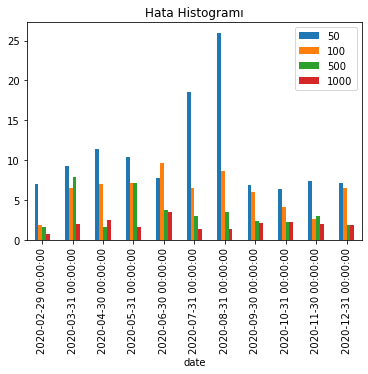

In [123]:
import matplotlib.pyplot as plt
ax = dff.plot.bar()
ax.set_title("Hata Histogramı",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# 5. Soru

In [124]:
df20a = pd.DataFrame(df20)
df20a['month'] = pd.DatetimeIndex(df20a['date']).month
df20a.index = df20a.month
df20a = df20a.iloc[:,7:13]

In [125]:
df20a

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
month,,,,,,
2,2.0,3.0,-11.0,-4.0,7.0,1.0
2,7.0,6.0,14.0,2.0,5.0,0.0
2,6.0,5.0,10.0,5.0,8.0,-2.0
2,4.0,6.0,11.0,4.0,8.0,-2.0
2,0.0,3.0,6.0,0.0,9.0,-2.0
...,...,...,...,...,...,...
12,-93.0,NaN,NaN,NaN,-59.0,21.0
12,-43.0,35.0,NaN,-33.0,-30.0,11.0
12,-46.0,36.0,NaN,-34.0,-29.0,12.0


In [126]:
df50 = pd.DataFrame()
df100 = pd.DataFrame()
df500 = pd.DataFrame()
df1000 = pd.DataFrame()

for y in df20a.index.drop_duplicates():
            df50 = df50.append((df20a.loc[y].sample(n = 50)))
for y in df20a.index.drop_duplicates():
            df100 = df100.append((df20a.loc[y].sample(n = 100)))
for y in df20a.index.drop_duplicates():
            df500 = df500.append((df20a.loc[y].sample(n = 500)))
for y in df20a.index.drop_duplicates():
            df1000 = df1000.append((df20a.loc[y].sample(n = 1000)))

In [127]:
df50

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
month,,,,,,
2,9.0,10.0,5.0,-7.0,7.0,-2.0
2,NaN,-10.0,NaN,NaN,6.0,NaN
2,10.0,6.0,16.0,NaN,9.0,-2.0
2,7.0,3.0,16.0,NaN,11.0,-1.0
2,NaN,NaN,NaN,NaN,13.0,NaN
...,...,...,...,...,...,...
12,-89.0,-68.0,-77.0,-83.0,-54.0,20.0
12,NaN,NaN,NaN,NaN,-15.0,NaN
12,-28.0,61.0,-17.0,-8.0,-25.0,7.0


In [128]:
df50 = df50.replace(0, np.NaN)
df50 = df50.groupby(level=0).mean()

df100 = df100.replace(0, np.NaN)
df100 = df100.groupby(level=0).mean()

df500 = df500.replace(0, np.NaN)
df500 = df500.groupby(level=0).mean()

df1000 = df1000.replace(0, np.NaN)
df1000 = df1000.groupby(level=0).mean()

In [129]:
df20x.index = range(2,len(df20x)+2)

In [130]:
df50

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
month,,,,,,
2,0.966667,3.558824,7.466667,-4.826087,9.782609,-0.962963
3,-15.838710,-2.486486,0.000000,-22.129032,-13.186047,4.642857
4,-60.303030,-22.117647,-40.266667,-60.086957,-48.387755,18.954545
5,-56.351351,-12.756757,-28.135135,-58.571429,-47.617021,18.031250
6,-7.833333,22.451613,37.035714,-13.466667,-7.155556,3.043478
7,-11.342857,4.902439,57.709677,-1.833333,-12.220000,-0.428571
8,-17.230769,-0.428571,52.000000,4.416667,-13.909091,-0.620690
9,-11.760000,9.724138,43.608696,-11.259259,-9.409091,3.241379
10,-13.555556,17.269231,27.181818,-17.368421,-11.500000,2.968750


In [131]:
df20x

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2,2.028130,3.238759,4.509374,-6.643751,9.353484,-0.698443
3,-21.700010,-4.395083,-6.153226,-22.896115,-12.652553,6.332819
4,-63.148836,-26.497847,-42.117354,-64.418867,-47.539997,20.742720
5,-55.673896,-15.239506,-28.837900,-58.020520,-41.539711,17.455508
6,-18.156210,12.410230,32.502002,-17.117761,-10.425022,4.339668
7,-6.876458,15.260359,55.750799,-1.882360,-10.858957,-0.082189
8,-9.014545,9.800086,60.977582,1.375155,-16.412747,-0.669343
9,-13.071653,10.092360,38.977984,-11.851192,-11.053215,2.389219
10,-13.590351,19.569650,30.077698,-10.521094,-8.295500,3.886670
11,-26.801938,9.294253,-1.853678,-25.197093,-14.877225,8.382888


In [132]:
df50 = abs(df50).subtract(abs(df20x))
df50 = abs(df50)

df100 = abs(df100).subtract(abs(df20x))
df100 = abs(df100)

df500 = abs(df500).subtract(abs(df20x))
df500 = abs(df500)

df1000 = abs(df1000).subtract(abs(df20x))
df1000 = abs(df1000)

In [133]:
df50

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
month,,,,,,
2,1.061463,0.320064,2.957293,1.817664,0.429125,0.264520
3,5.861300,1.908596,6.153226,0.767083,0.533493,1.689962
4,2.845806,4.380200,1.850688,4.331910,0.847758,1.788175
5,0.677455,2.482750,0.702765,0.550909,6.077310,0.575742
6,10.322876,10.041383,4.533712,3.651095,3.269467,1.296190
7,4.466400,10.357920,1.958879,0.049026,1.361043,0.346383
8,8.216224,9.371515,8.977582,3.041512,2.503656,0.048653
9,1.311653,0.368222,4.630712,0.591933,1.644124,0.852160
10,0.034795,2.300419,2.895880,6.847327,3.204500,0.917920


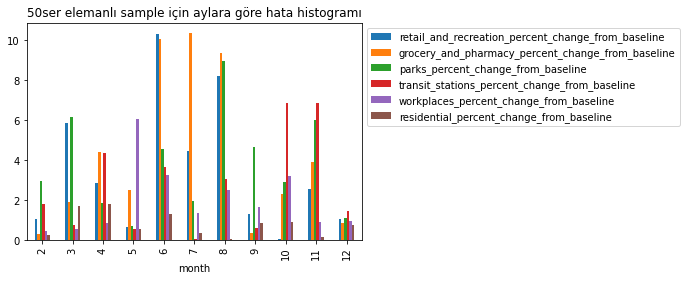

In [134]:
ax = df50.plot.bar()
ax.set_title("50ser elemanlı sample için aylara göre hata histogramı",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

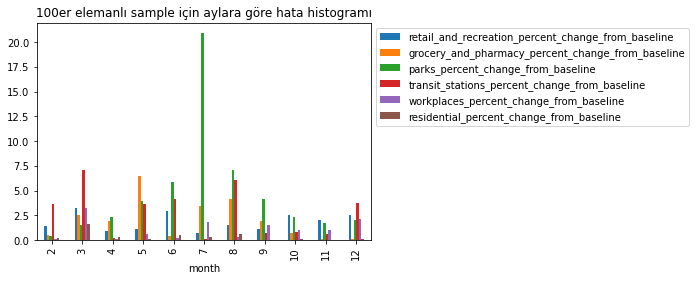

In [135]:
ax = df100.plot.bar()
ax.set_title("100er elemanlı sample için aylara göre hata histogramı",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

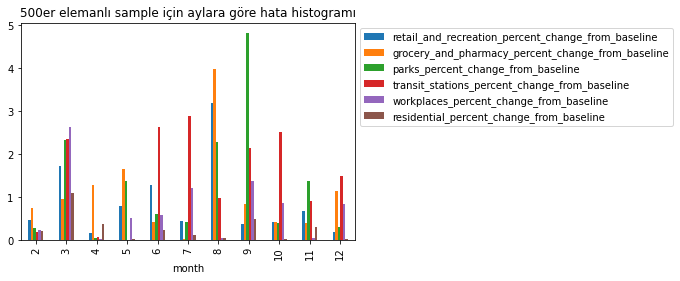

In [136]:
ax = df500.plot.bar()
ax.set_title("500er elemanlı sample için aylara göre hata histogramı",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

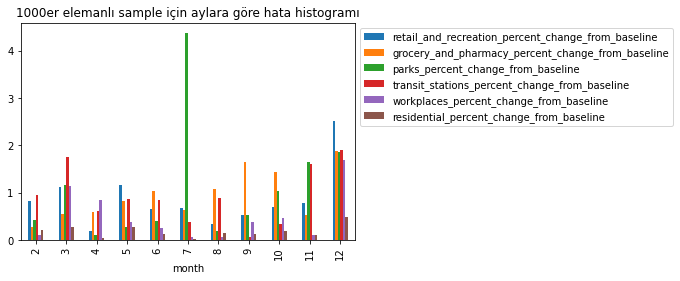

In [137]:
ax = df1000.plot.bar()
ax.set_title("1000er elemanlı sample için aylara göre hata histogramı",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [138]:
df50=df50.mean(axis = 1)
df50

month
2     1.141688
3     2.818943
4     2.674089
5     1.844489
6     5.519120
7     3.089942
8     5.359857
9     1.566467
10    2.700140
11    3.392091
12    1.019717
dtype: float64

0     1.904878
1     3.367157
2     3.293717
3     2.752434
4     1.158388
5     1.979524
6     5.412564
7     2.848584
8     2.140762
9     3.767604
10    3.492017
11    0.258836
12    4.155303
13    1.126739
14    2.471355
15    4.027260
16    3.964769
17    2.795722
18    2.163728
19    1.744844
20    2.035759
21    2.378896
dtype: float64